In [1]:
import pandas as pd
import os

DATA_DIR = "/kaggle/input/vqa-rad-visual-question-answering-radiology"

In [2]:
data = pd.read_excel(DATA_DIR+"/VQA_RAD Dataset Public.xlsx")

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
data.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED
3,3,freeform,0e90b6bc-265f-490b-a039-509b9907a3cb,https://medpix.nlm.nih.gov/case?id=19aa8a2b-35...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,What type of imaging does this not represent?,NaN,NaN,NaN,MODALITY,ultrasound,OPEN
4,4,freeform,1179f612-12e0-4dda-aee0-f14a5200be7b,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,Is this a MRI of the chest?,NaN,NaN,NaN,MODALITY,no,CLOSED


In [4]:
# Function to extract filename and append to parent dir

def extract_filename_and_append(row, parent_dir):
    filename = os.path.basename(row['IMAGEID'])
    return os.path.join(parent_dir, filename)

data['img_path'] = data.apply(extract_filename_and_append, parent_dir=DATA_DIR+"/VQA_RAD Image Folder/VQA_RAD Image Folder", axis=1)

In [5]:
data["img_path"][0]

'/kaggle/input/vqa-rad-visual-question-answering-radiology/VQA_RAD Image Folder/VQA_RAD Image Folder/synpic54610.jpg'

In [6]:
data['cleaned_question'] = data['QUESTION'].str.replace("?", "").str.lower()
data['labels'] = data['ANSWER'].str.lower()

In [7]:
data.head()

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,img_path,cleaned_question,labels
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,/kaggle/input/vqa-rad-visual-question-answerin...,are regions of the brain infarcted,yes
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,/kaggle/input/vqa-rad-visual-question-answerin...,are the lungs normal appearing,no
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,/kaggle/input/vqa-rad-visual-question-answerin...,is there evidence of a pneumothorax,no
3,3,freeform,0e90b6bc-265f-490b-a039-509b9907a3cb,https://medpix.nlm.nih.gov/case?id=19aa8a2b-35...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,What type of imaging does this not represent?,NaN,NaN,NaN,MODALITY,ultrasound,OPEN,/kaggle/input/vqa-rad-visual-question-answerin...,what type of imaging does this not represent,ultrasound
4,4,freeform,1179f612-12e0-4dda-aee0-f14a5200be7b,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,given,Is this a MRI of the chest?,NaN,NaN,NaN,MODALITY,no,CLOSED,/kaggle/input/vqa-rad-visual-question-answerin...,is this a mri of the chest,no


In [8]:
data['labels'].value_counts()

labels
no                          606
yes                         587
axial                        43
right                        26
left                         19
                           ... 
ascending colon               1
r hemidiaphragm               1
almost entire right side      1
fluid                         1
imaging artifacts             1
Name: count, Length: 512, dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


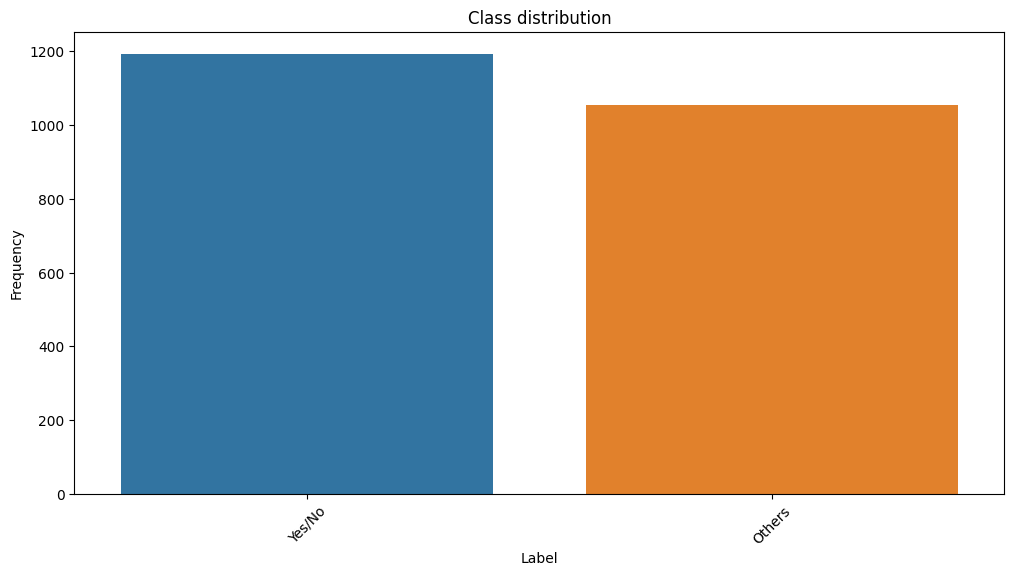

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = data["labels"]
# Convert labels to a DataFrame
df = pd.DataFrame({'labels': labels})

# Get the top 10 labels
top_10 = df['labels'].value_counts().nlargest(2)

# Replace all other labels with 'Others'
df['labels'] = df['labels'].apply(lambda x: 'Yes/No' if x in top_10.index else 'Others')

# Count the occurrences after grouping 'Others'
label_counts = df['labels'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Class distribution')
plt.xticks(rotation=45)
plt.show()

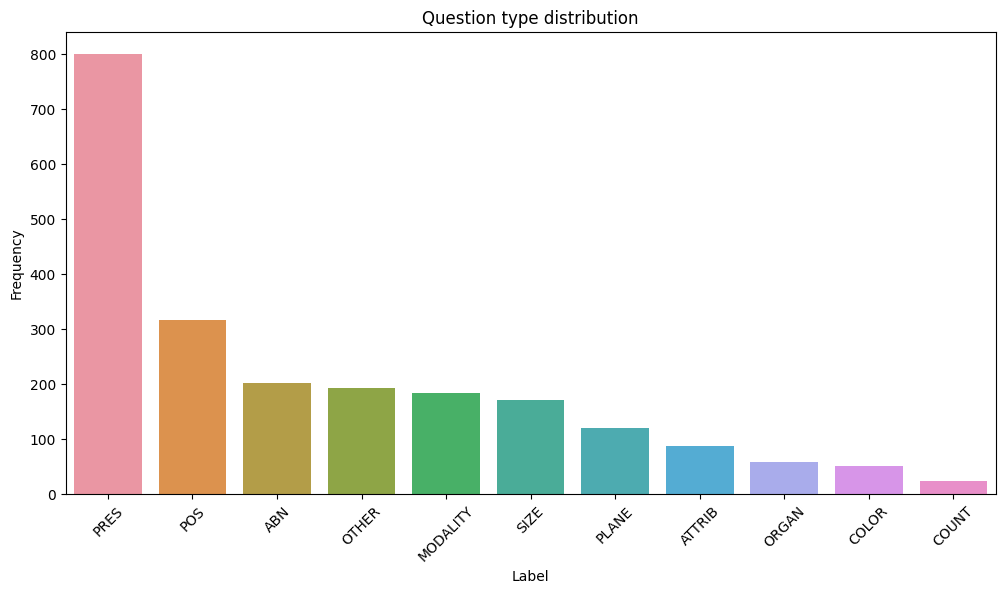

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data['labels'] is your labels data
labels = data['Q_TYPE']

# Convert labels to a DataFrame
df = pd.DataFrame({'labels': labels})

# Count the occurrences of each label
label_counts = df['labels'].value_counts().nlargest(11)  # Top 20 classes

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Question type distribution')
plt.xticks(rotation=45)
plt.show()


In [11]:
from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
# model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

In [12]:
import torch

# Define the device (CPU or GPU) to train the models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BERT_MAX_LEN = 128
BATCH_SIZE = 32

In [13]:
import torch
from torch.utils.data import Dataset
from PIL import Image
from transformers import AutoTokenizer

class MultimodalDataset(Dataset):
    def __init__(self, image_paths, texts, labels, transform=None):
        self.image_paths = image_paths
        self.texts = texts
        self.labels = labels
        self.transform = transform
        self.tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-v1.1')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Load and transform image
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Adjust path as needed
        if self.transform is not None:
            image = self.transform(image)

        # Encode text using BioBERT tokenizer
        text = self.texts[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            max_length=128,  # Adjust as needed
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        # Get label
        label = self.labels[idx]

        return image, input_ids, attention_mask, label

In [14]:
img_paths = data['img_path'].values.tolist()
questions = data['cleaned_question'].values.tolist()

In [15]:
from sklearn.preprocessing import LabelEncoder

labels = data['labels'].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

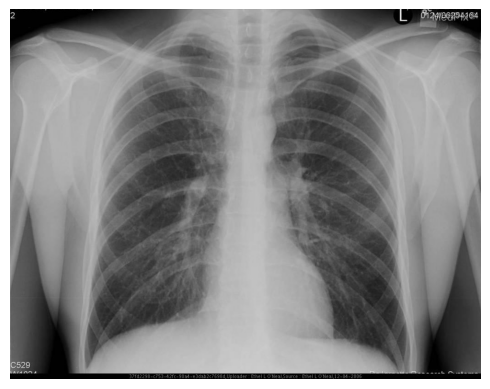

Question: is there a left apical pneumothorax
Label: yes


In [24]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Select a random index from the lists
random_index = random.randint(0, len(img_paths) - 1)

# Get the image path and question at the random index
random_img_path = img_paths[random_index]
random_question = questions[random_index]
random_label = labels[random_index]

# Load and display the image
image = Image.open(random_img_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Print the corresponding question
print("Question:", random_question)
print("Label:", random_label)

In [25]:
image.save("random_image.png")

In [16]:
num_classes = len(label_encoder.classes_)
print("Number of classes:", num_classes)

Number of classes: 513


In [17]:
import pickle

class_number_to_label = {class_number: label for class_number, label in enumerate(label_encoder.classes_)}

# Saving the dictionary to a file
with open('class_to_label.pkl', 'wb') as file:
    pickle.dump(class_number_to_label, file)

In [18]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
img_paths_train, img_paths_test, questions_train, questions_test, labels_train, labels_test = train_test_split(
    img_paths, questions, encoded_labels, test_size=0.2, random_state=42
)

In [19]:
# Define transforms for image preprocessing
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = MultimodalDataset(
    image_paths=img_paths_train,
    texts=questions_train,
    labels=labels_train,
    transform=transform
)

test_dataset = MultimodalDataset(
    image_paths=img_paths_test,
    texts=questions_test,
    labels=labels_test,
    transform=transform 
)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [20]:
# Create a dataloader for efficient batch loading
from torch.utils.data import Dataset, DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

## Model

In [18]:
import torch
import torch.nn as nn
from torchvision.models import resnet152
from transformers import AutoModel


In [19]:
class MFBPooling(nn.Module):
    def __init__(self, image_dim, text_dim, output_dim, k):
        """
        image_dim: Dimension of image features
        text_dim: Dimension of text features
        output_dim: Dimension of output feature vector
        k: Number of factors in factorized bilinear pooling
        """
        super(MFBPooling, self).__init__()
        self.output_dim = output_dim
        self.k = k
        self.linear_img = nn.Linear(image_dim, output_dim * k)
        self.linear_txt = nn.Linear(text_dim, output_dim * k)

    def forward(self, img_features, txt_features):
        # Apply linear transformations
        img_features = self.linear_img(img_features)  # Shape: [batch_size, output_dim * k]
        txt_features = self.linear_txt(txt_features)  # Shape: [batch_size, output_dim * k]

        # Element-wise multiplication
        fused_features = img_features * txt_features  # Shape: [batch_size, output_dim * k]

        # Reshape and sum across k dimensions
        fused_features = fused_features.reshape(-1, self.output_dim, self.k)
        fused_features = torch.sum(fused_features, dim=2)  # Shape: [batch_size, output_dim]

        return fused_features

In [20]:
class CoarseAttention(nn.Module):
    def __init__(self, fusion_dim, attention_dim):
        super(CoarseAttention, self).__init__()
        self.image_attention = nn.Linear(fusion_dim, attention_dim)
        self.text_attention = nn.Linear(fusion_dim, attention_dim)
        self.final_attention = nn.Linear(attention_dim, 1)

    def forward(self, image_features, text_features):
        # Assuming image_features and text_features are already fused and have same dimension
        image_attention_weights = torch.tanh(self.image_attention(image_features))
        text_attention_weights = torch.tanh(self.text_attention(text_features))

        combined_attention = image_attention_weights + text_attention_weights
        attention_weights = torch.softmax(self.final_attention(combined_attention), dim=1)

        return attention_weights * image_features

class FineAttention(nn.Module):
    def __init__(self, fusion_dim, num_heads):
        super(FineAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=fusion_dim, num_heads=num_heads)

    def forward(self, key, value, query):
        # key, value, and query are the same in self-attention
        attn_output, _ = self.multihead_attn(query, key, value)
        return attn_output

In [ ]:
# class EnhancedCoarseAttention(nn.Module):
#     def __init__(self, image_dim, text_dim, fusion_dim, attention_dim):
#         super(EnhancedCoarseAttention, self).__init__()
#         self.image_projection = nn.Linear(image_dim, attention_dim)
#         self.text_projection = nn.Linear(text_dim, attention_dim)
#         self.fusion_projection = nn.Linear(fusion_dim, attention_dim)
#         self.attention_score = nn.Linear(attention_dim, 1)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, img_features, txt_features, fused_features):
#         # Project features to a common dimension
#         img_att = torch.tanh(self.image_projection(img_features))
#         txt_att = torch.tanh(self.text_projection(txt_features))
#         fused_att = torch.tanh(self.fusion_projection(fused_features))

#         # Compute interactions
#         img_interaction = img_att * fused_att
#         txt_interaction = txt_att * fused_att

#         # Combine interactions
#         combined_interaction = img_interaction + txt_interaction

#         # Compute attention scores and normalize
#         attention_scores = self.attention_score(combined_interaction)
#         attention_weights = self.softmax(attention_scores)

#         # Apply attention weights
#         attended_features = attention_weights * fused_features
#         return attended_features

In [21]:
import torch
import torch.nn as nn
from torchvision.models import resnet152
from transformers import AutoModel

class VQAModel(nn.Module):
    def __init__(self, num_classes):
        super(VQAModel, self).__init__()

        # Image Encoder
        self.image_encoder = resnet152(pretrained=True)
        self.image_encoder.fc = nn.Identity()

        # Question Encoder
        self.text_encoder = AutoModel.from_pretrained('dmis-lab/biobert-v1.1')

        # MFB Pooling
        self.mfb_pooling = MFBPooling(image_dim=2048, text_dim=768, output_dim=1024, k=5)

        # Attention Mechanisms
        self.coarse_attention = CoarseAttention(fusion_dim=1024, attention_dim=512)
        self.fine_attention = FineAttention(fusion_dim=1024, num_heads=8)
        
        # Classifier - MLP
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)  # num_classes: number of answer classes
        )
        
    def forward(self, images, input_ids, attention_mask):
        # Image features
        image_features = self.image_encoder(images)

        # Text features
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.last_hidden_state[:, 0, :]

        fused_features = self.mfb_pooling(image_features, text_features)
        coarse_attn_output = self.coarse_attention(fused_features, fused_features)
        fine_attn_output = self.fine_attention(coarse_attn_output, coarse_attn_output, coarse_attn_output)
        
        output = self.classifier(fine_attn_output)

        return output

## Train & Eval

In [22]:
from tqdm import tqdm
import torch
import torch.nn as nn

model = VQAModel(num_classes=513) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Lists to store per-epoch loss and accuracy
epoch_losses = []
epoch_accuracies = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train()

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for images, input_ids, attention_mask, labels in progress_bar:
        images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        acc = accuracy(outputs, labels)
        train_acc += acc

        progress_bar.set_postfix({'loss': loss.item(), 'acc': acc.item()})

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    epoch_losses.append(train_loss)
    epoch_accuracies.append(train_acc)

    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")

torch.save(model.state_dict(), 'vqa_model.pt')

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 78.2MB/s] 


pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

Epoch 1/30: 100%|██████████| 57/57 [01:06<00:00,  1.16s/it, loss=4.36, acc=0.333]


Training Loss: 5.2085, Training Accuracy: 0.2432


Epoch 2/30: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it, loss=3.98, acc=0.5]  


Training Loss: 4.3063, Training Accuracy: 0.2812


Epoch 3/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=4.98, acc=0.333]


Training Loss: 4.1427, Training Accuracy: 0.2701


Epoch 4/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=4.94, acc=0.5]  


Training Loss: 4.0833, Training Accuracy: 0.2780


Epoch 5/30: 100%|██████████| 57/57 [00:57<00:00,  1.02s/it, loss=5.38, acc=0.167] 


Training Loss: 4.0598, Training Accuracy: 0.2557


Epoch 6/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.85, acc=0.333]


Training Loss: 4.0036, Training Accuracy: 0.2882


Epoch 7/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=3.01, acc=0.333] 


Training Loss: 4.0227, Training Accuracy: 0.2531


Epoch 8/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.72, acc=0.167]


Training Loss: 3.9772, Training Accuracy: 0.2825


Epoch 9/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=7.43, acc=0.167] 


Training Loss: 3.9825, Training Accuracy: 0.2557


Epoch 10/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=5.42, acc=0.333] 


Training Loss: 3.9028, Training Accuracy: 0.2558


Epoch 11/30: 100%|██████████| 57/57 [00:57<00:00,  1.02s/it, loss=3.71, acc=0.167]


Training Loss: 3.9011, Training Accuracy: 0.2677


Epoch 12/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.3, acc=0.167] 


Training Loss: 3.8582, Training Accuracy: 0.2765


Epoch 13/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=6.71, acc=0]     


Training Loss: 3.8995, Training Accuracy: 0.2643


Epoch 14/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=4.36, acc=0.167]


Training Loss: 3.8604, Training Accuracy: 0.2765


Epoch 15/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=3.95, acc=0]     


Training Loss: 3.8513, Training Accuracy: 0.2626


Epoch 16/30: 100%|██████████| 57/57 [00:58<00:00,  1.03s/it, loss=4.68, acc=0.167]


Training Loss: 3.8555, Training Accuracy: 0.2699


Epoch 17/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=4.25, acc=0.333]


Training Loss: 3.8464, Training Accuracy: 0.2674


Epoch 18/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.2, acc=0.5]    


Training Loss: 3.8419, Training Accuracy: 0.2643


Epoch 19/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.43, acc=0.5]   


Training Loss: 3.8269, Training Accuracy: 0.2834


Epoch 20/30: 100%|██████████| 57/57 [00:57<00:00,  1.02s/it, loss=3.26, acc=0.5]   


Training Loss: 3.8316, Training Accuracy: 0.2812


Epoch 21/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=2.96, acc=0.167]


Training Loss: 3.8200, Training Accuracy: 0.2716


Epoch 22/30: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it, loss=4, acc=0.333]    


Training Loss: 3.8276, Training Accuracy: 0.2772


Epoch 23/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=4.4, acc=0.167] 


Training Loss: 3.8302, Training Accuracy: 0.2732


Epoch 24/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=5.39, acc=0.333]


Training Loss: 3.8496, Training Accuracy: 0.2745


Epoch 25/30: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it, loss=3.04, acc=0]    


Training Loss: 3.8014, Training Accuracy: 0.2593


Epoch 26/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=6.16, acc=0]     


Training Loss: 3.8585, Training Accuracy: 0.2681


Epoch 27/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=3.88, acc=0.5]  


Training Loss: 3.7981, Training Accuracy: 0.3114


Epoch 28/30: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it, loss=3.96, acc=0.167]


Training Loss: 3.8100, Training Accuracy: 0.2995


Epoch 29/30: 100%|██████████| 57/57 [00:58<00:00,  1.02s/it, loss=2.04, acc=0.5]  


Training Loss: 3.7575, Training Accuracy: 0.3032


Epoch 30/30: 100%|██████████| 57/57 [00:57<00:00,  1.01s/it, loss=3.02, acc=0.5]  


Training Loss: 3.7622, Training Accuracy: 0.3070


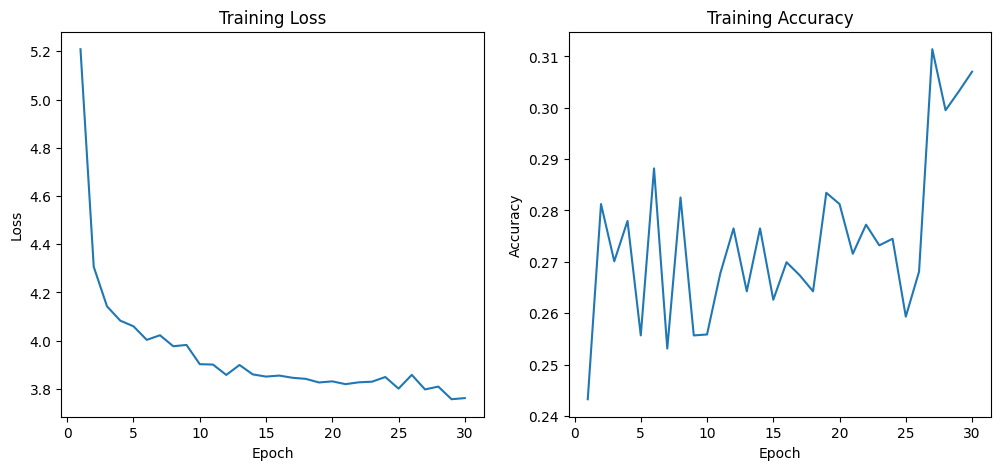

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), epoch_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [47]:
print(epoch_losses)
print()
acc = [float(tensor_item.item()) for tensor_item in epoch_accuracies]
print(acc)

[5.208491153884352, 4.306273468753748, 4.142707603019581, 4.083284398965668, 4.0597810661583615, 4.003565077196088, 4.022686071563185, 3.9771821247903922, 3.982471967998304, 3.902833106224997, 3.9011396190576386, 3.8581881523132324, 3.899463264565719, 3.8603953227662204, 3.851334287409197, 3.855501137281719, 3.8464243537501286, 3.8419066270192466, 3.8269479316577577, 3.831609604651468, 3.8199712184437535, 3.8275643106092487, 3.8302078874487626, 3.84961480006837, 3.80143694292035, 3.858514564079151, 3.798060095101072, 3.8099501049309445, 3.7575009454760635, 3.762168202483863, 3.734748179452461, 3.734116181992648, 3.759094660742241, 3.7372946613713314, 3.738576972693728, 3.778707880722849, 3.7451416442268775, 3.712698957376313, 3.7465785553580835, 3.786002226043166, 3.7724325029473555, 3.747504100464938, 3.7363263807798686, 3.770014532825403, 3.7468558403483607, 3.753106531343962, 3.750300173173871, 3.764695774044907, 3.753808067556013, 3.7347000983723424, 3.7514819806082205, 3.744819327

In [ ]:
model = VQAModel(num_classes=513)
model.load_state_dict(torch.load('vqa_model.pt'))
model.to(device)

In [28]:
# Continue training for additional epochs
additional_epochs = 30
total_epochs = num_epochs + additional_epochs

# Assuming epoch_losses and epoch_accuracies are already populated from previous training
for epoch in range(num_epochs, total_epochs):
    train_loss = 0
    train_acc = 0
    model.train()

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{total_epochs}")
    for images, input_ids, attention_mask, labels in progress_bar:
        images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        acc = accuracy(outputs, labels)
        train_acc += acc

        progress_bar.set_postfix({'loss': loss.item(), 'acc': acc.item()})

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Append the new loss and accuracy
    epoch_losses.append(train_loss)
    epoch_accuracies.append(train_acc)

    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")

# Optionally save the model again
torch.save(model.state_dict(), 'vqa_model_continued.pt')

Epoch 31/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=3.23, acc=0.167]


Training Loss: 3.7347, Training Accuracy: 0.3045


Epoch 32/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=3.28, acc=0.5]  


Training Loss: 3.7341, Training Accuracy: 0.3032


Epoch 33/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=3.91, acc=0.333]


Training Loss: 3.7591, Training Accuracy: 0.3052


Epoch 34/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=2.56, acc=0.333]


Training Loss: 3.7373, Training Accuracy: 0.3003


Epoch 35/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=2.86, acc=0.5]   


Training Loss: 3.7386, Training Accuracy: 0.2993


Epoch 36/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=5.54, acc=0.333] 


Training Loss: 3.7787, Training Accuracy: 0.3052


Epoch 37/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=4.2, acc=0.333] 


Training Loss: 3.7451, Training Accuracy: 0.3123


Epoch 38/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=2.11, acc=0.5]  


Training Loss: 3.7127, Training Accuracy: 0.3070


Epoch 39/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=3.88, acc=0.167] 


Training Loss: 3.7466, Training Accuracy: 0.3017


Epoch 40/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=6.1, acc=0.167]  


Training Loss: 3.7860, Training Accuracy: 0.2957


Epoch 41/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=5.22, acc=0.167]


Training Loss: 3.7724, Training Accuracy: 0.3017


Epoch 42/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=4.48, acc=0.167]


Training Loss: 3.7475, Training Accuracy: 0.2979


Epoch 43/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=2.96, acc=0.5]  


Training Loss: 3.7363, Training Accuracy: 0.3037


Epoch 44/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=5.39, acc=0]     


Training Loss: 3.7700, Training Accuracy: 0.3092


Epoch 45/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=3.14, acc=0]    


Training Loss: 3.7469, Training Accuracy: 0.2999


Epoch 46/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=4.4, acc=0]     


Training Loss: 3.7531, Training Accuracy: 0.3015


Epoch 47/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=3.42, acc=0.167]


Training Loss: 3.7503, Training Accuracy: 0.2973


Epoch 48/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=4.89, acc=0.167]


Training Loss: 3.7647, Training Accuracy: 0.3050


Epoch 49/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=3.95, acc=0.5]  


Training Loss: 3.7538, Training Accuracy: 0.3026


Epoch 50/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=2.95, acc=0.5]  


Training Loss: 3.7347, Training Accuracy: 0.3109


Epoch 51/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=2.99, acc=0.167] 


Training Loss: 3.7515, Training Accuracy: 0.3006


Epoch 52/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=3.85, acc=0.333] 


Training Loss: 3.7448, Training Accuracy: 0.3079


Epoch 53/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=4.42, acc=0.167]


Training Loss: 3.7511, Training Accuracy: 0.3045


Epoch 54/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=2.84, acc=0.333]


Training Loss: 3.7268, Training Accuracy: 0.3096


Epoch 55/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=4.33, acc=0]    


Training Loss: 3.7597, Training Accuracy: 0.3026


Epoch 56/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=3.92, acc=0.333] 


Training Loss: 3.7518, Training Accuracy: 0.3046


Epoch 57/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=1.52, acc=0.5]  


Training Loss: 3.7140, Training Accuracy: 0.3125


Epoch 58/60: 100%|██████████| 57/57 [00:57<00:00,  1.00s/it, loss=5.24, acc=0.167]


Training Loss: 3.7764, Training Accuracy: 0.3088


Epoch 59/60: 100%|██████████| 57/57 [00:56<00:00,  1.01it/s, loss=4.61, acc=0.167]


Training Loss: 3.7629, Training Accuracy: 0.3001


Epoch 60/60: 100%|██████████| 57/57 [00:56<00:00,  1.00it/s, loss=2.31, acc=0.333]


Training Loss: 3.7266, Training Accuracy: 0.3096


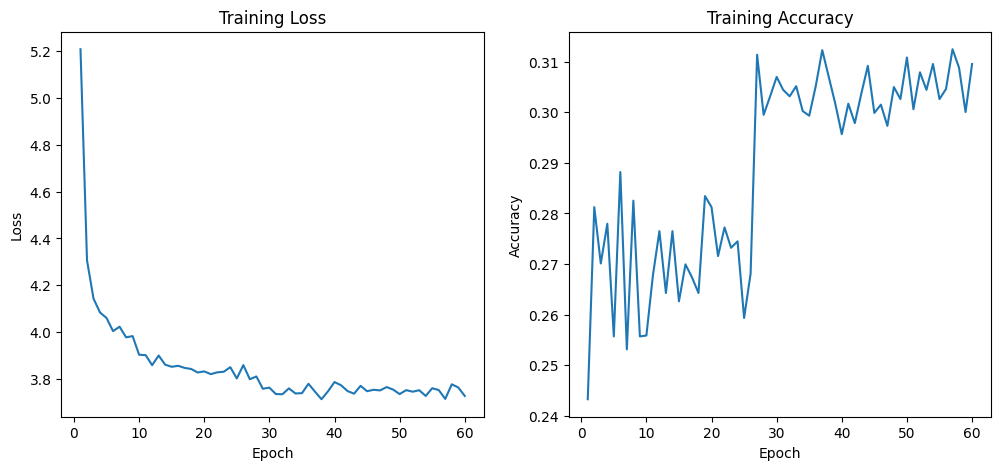

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, total_epochs + 1), epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, total_epochs + 1), epoch_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# Initialize accumulators
test_loss = 0
test_acc = 0
all_predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    progress_bar = tqdm(test_dataloader, desc="Testing")
    for batch in progress_bar:
        images, input_ids, attention_mask, labels = batch
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        
        outputs = model(images, input_ids, attention_mask)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        acc = accuracy(outputs, labels)
        test_acc += acc

        _, predicted_labels = torch.max(outputs, dim=1)
        all_predictions.extend(predicted_labels.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        progress_bar.set_postfix({'loss': loss.item(), 'acc': acc.item()})

# Calculate the average loss and accuracy
test_loss /= len(test_dataloader)
test_acc /= len(test_dataloader)
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(all_labels, all_predictions, average='macro')
recall = recall_score(all_labels, all_predictions, average='macro')
f1 = f1_score(all_labels, all_predictions, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Testing: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s, loss=1.28, acc=0.5]  

Testing Loss: 4.2762, Testing Accuracy: 0.2833
Precision: 0.0032, Recall: 0.0063, F1 Score: 0.0042



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
